# Trends in the use of sustainable energies:

- What types of energy are there and which countries use them?
- Top 10 countries and the energies they use
- Relationship between electricity access and GDP
- Electricity access vs population

In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
csv_reader="Copia de global-data-on-sustainable-energy (1).csv"
global_data=pd.read_csv(csv_reader)
global_df=pd.DataFrame(global_data)
global_df.dropna()
global_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [3]:
data= {"Entity":"Country","Year":"Year"}
energy_types_df=pd.DataFrame(global_df.loc[:,["Electricity from fossil fuels (TWh)","Electricity from nuclear (TWh)","Electricity from renewables (TWh)"]])
energy_types_df


,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
0,0.16,0.0,0.31
1,0.09,0.0,0.50
2,0.13,0.0,0.56
3,0.31,0.0,0.63
4,0.33,0.0,0.56
...,...,...,...
3644,3.50,0.0,3.32
3645,3.05,0.0,4.30
3646,3.73,0.0,5.46
3647,3.66,0.0,4.58


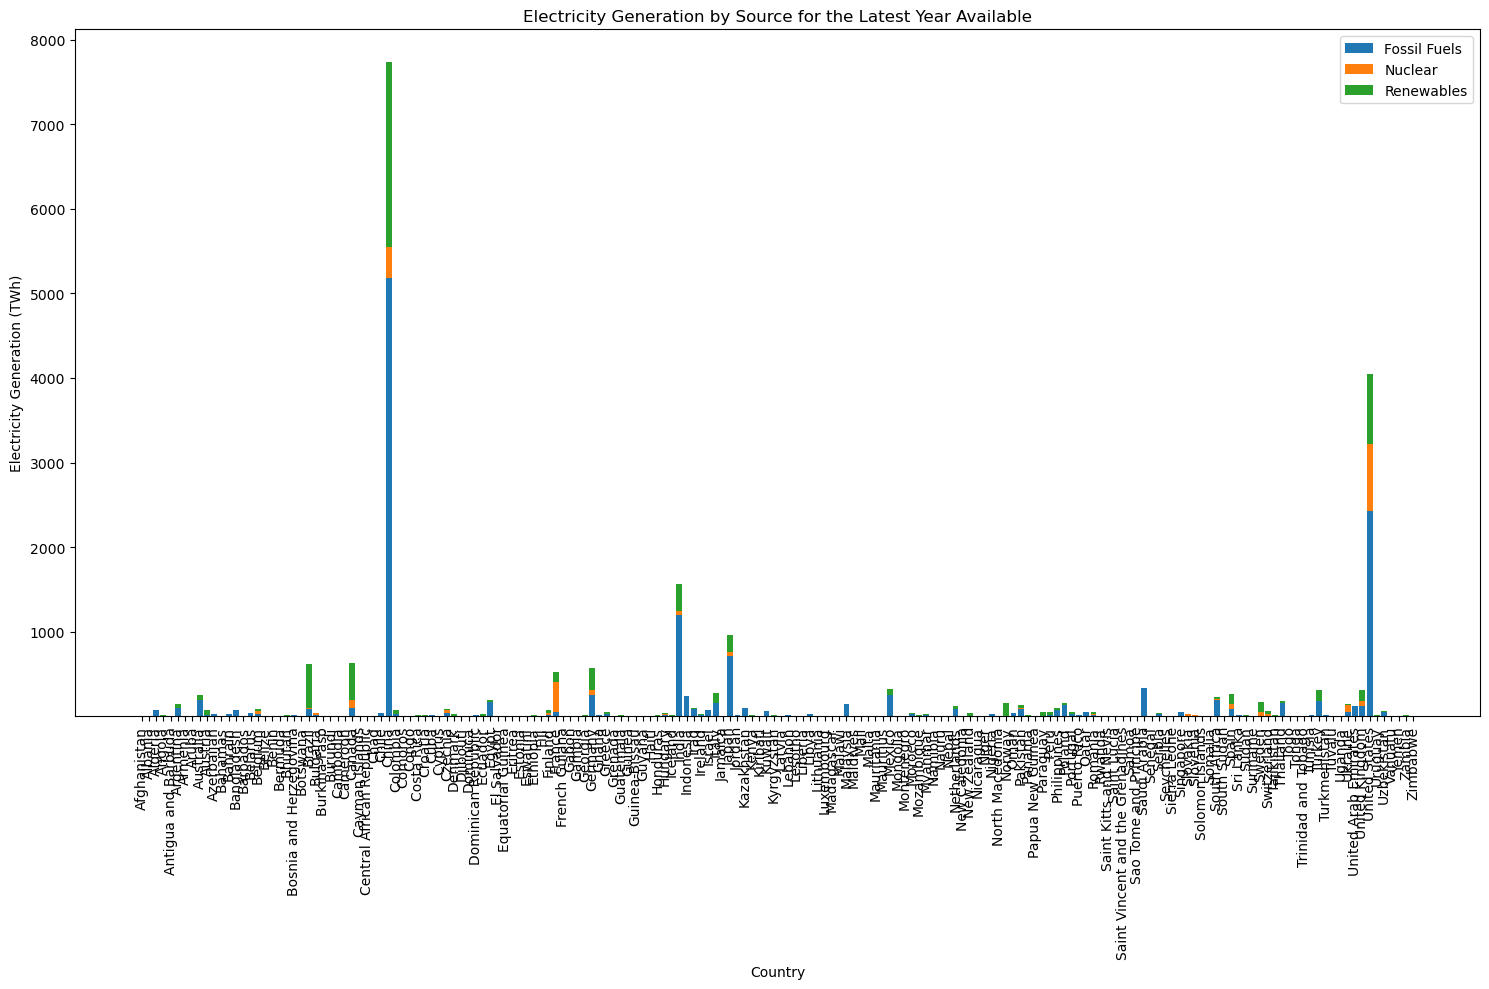

In [4]:
#Electricity Generation by source (2020) last year available
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()
filtered_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

plot_data = filtered_df[['Entity', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]

countries = plot_data['Entity']
fossil_fuels = plot_data['Electricity from fossil fuels (TWh)']
nuclear = plot_data['Electricity from nuclear (TWh)']
renewables = plot_data['Electricity from renewables (TWh)']

plt.figure(figsize=(15, 10))
plt.bar(countries, fossil_fuels, label='Fossil Fuels')
plt.bar(countries, nuclear, bottom=fossil_fuels, label='Nuclear')
plt.bar(countries, renewables, bottom=fossil_fuels+nuclear, label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation by Source for the Latest Year Available')
plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

The chart shows the generation of electricity by source in different countries. Most use renewable and fossil energies, with a smaller nuclear contribution. Several nations lead in renewables, possibly indicating sustainable energy policies. The proportion of sources varies, reflecting different national energy strategies and resources.

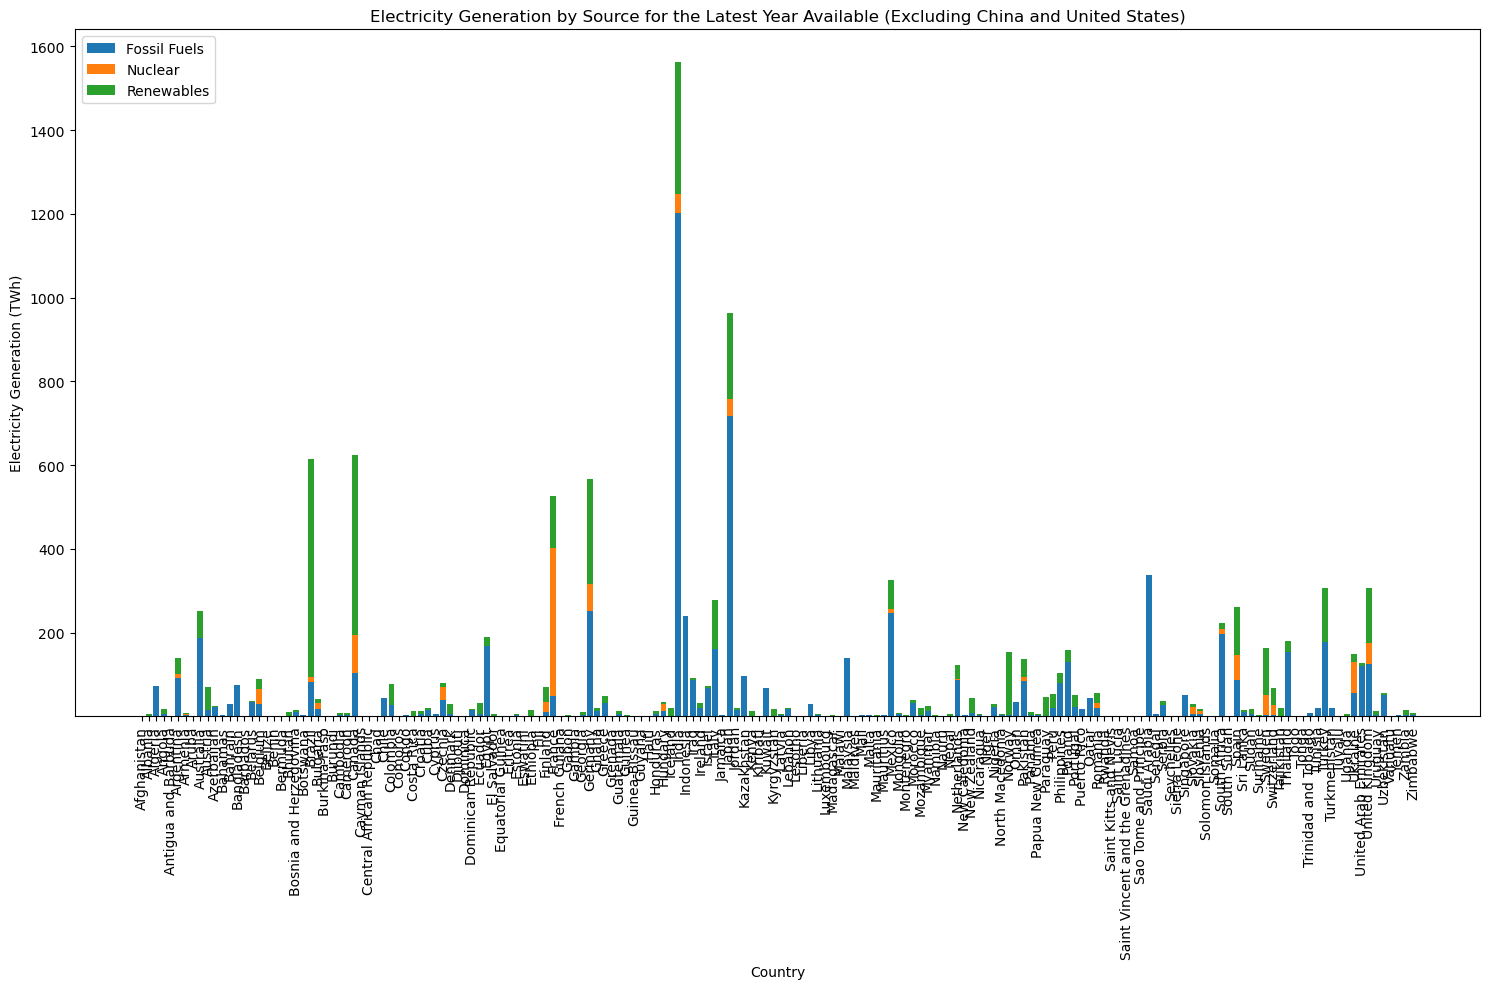

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2020,97.700000,33.20,9.35,NaN,NaN,0.12,0.0,0.68,...,702.8880,NaN,NaN,NaN,-2.351101,516.747871,60,652230.0,33.939110,67.709953
1,Albania,2020,100.000000,81.30,NaN,NaN,NaN,0.00,0.0,5.31,...,11158.0030,NaN,NaN,NaN,-3.955398,5246.292306,105,28748.0,41.153332,20.168331
2,Algeria,2020,99.804130,99.70,15.64,NaN,NaN,72.01,0.0,0.72,...,14933.8070,NaN,NaN,0.297899,-5.100000,3306.858208,18,2381741.0,28.033886,1.659626
3,Angola,2020,46.890610,50.20,115.43,NaN,NaN,4.49,0.0,12.10,...,3527.1600,NaN,NaN,NaN,-5.399987,1776.166868,26,1246700.0,-11.202692,17.873887
4,Antigua and Barbuda,2020,100.000000,100.00,167.98,NaN,NaN,0.31,0.0,0.02,...,27785.2270,NaN,NaN,NaN,-20.192371,13992.744480,223,443.0,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Uzbekistan,2020,100.000000,84.25,60.02,NaN,NaN,50.93,0.0,5.01,...,15860.6090,NaN,NaN,2.523421,1.714771,1750.697113,79,447400.0,41.377491,64.585262
172,Vanuatu,2020,67.333270,7.60,37.84,NaN,NaN,0.05,0.0,0.02,...,2923.5380,NaN,NaN,NaN,-6.813991,2870.089300,25,12189.0,-15.376706,166.959158
173,Yemen,2020,73.757930,61.50,8.48,NaN,NaN,2.74,0.0,0.49,...,1092.0021,NaN,NaN,NaN,NaN,NaN,56,527968.0,15.552727,48.516388
174,Zambia,2020,44.524475,10.40,138.23,NaN,NaN,2.00,0.0,13.10,...,3099.0830,NaN,NaN,NaN,-2.785055,985.132436,25,752618.0,-13.133897,27.849332


In [5]:
#The same as above (Excluding US and China)
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()
filtered_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

filtered_latestyear_df = filtered_df[~filtered_df['Entity'].isin(['China', 'United States'])]

plot_data = filtered_latestyear_df[['Entity', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]

plot_data = plot_data.sort_values('Entity')

countries = plot_data['Entity']
fossil_fuels = plot_data['Electricity from fossil fuels (TWh)']
nuclear = plot_data['Electricity from nuclear (TWh)']
renewables = plot_data['Electricity from renewables (TWh)']


plt.figure(figsize=(15, 10))
plt.bar(countries, fossil_fuels, label='Fossil Fuels')
plt.bar(countries, nuclear, bottom=fossil_fuels, label='Nuclear')
plt.bar(countries, renewables, bottom=fossil_fuels+nuclear, label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation by Source for the Latest Year Available (Excluding China and United States)')
plt.xticks(rotation=90) 

plt.legend()
plt.tight_layout()
plt.show()

filtered_latestyear_df.dropna()
filtered_latestyear_df


The chart appears to be a stacked histogram that compares the generation of electricity by source in various countries, excluding China and the United States. It shows the contribution of fossil fuels, nuclear energy, and renewables to the total electricity generation. Some countries rely more on renewables, while others significantly depend on fossil fuels and nuclear energy. This type of visualization helps to understand the energy mix of each nation and to identify leaders in renewable energies.

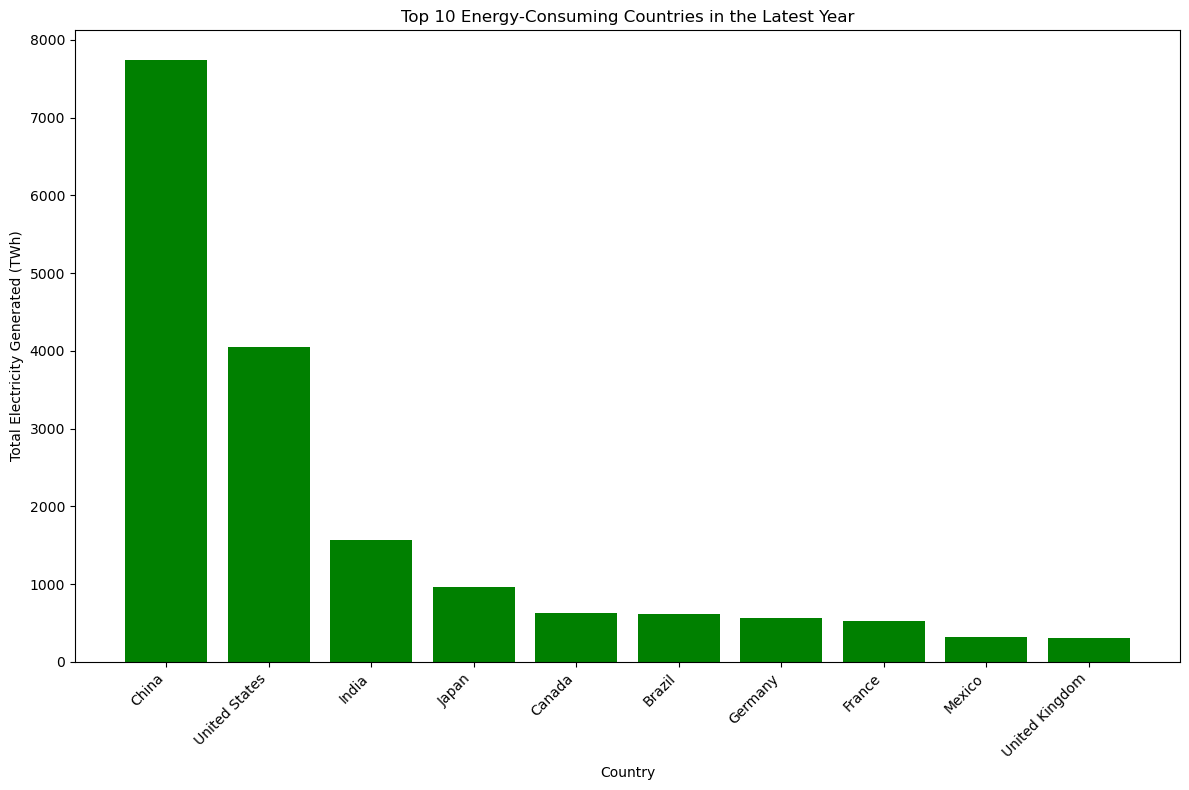

In [8]:
#Top 10 Energy consuming countries in 2020
global_df['Total Electricity (TWh)'] = global_df['Electricity from fossil fuels (TWh)'] + global_df['Electricity from nuclear (TWh)'] + global_df['Electricity from renewables (TWh)']
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()

latest_year_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

top_countries = latest_year_df.nlargest(10, 'Total Electricity (TWh)')

top_energy_use_df = top_countries[['Entity', 'Year', 'Total Electricity (TWh)']].reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.bar(top_energy_use_df['Entity'], top_energy_use_df['Total Electricity (TWh)'], color='green')
plt.xlabel('Country')
plt.ylabel('Total Electricity Generated (TWh)')
plt.title('Top 10 Energy-Consuming Countries in the Latest Year')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


This chart shows the top ten energy-consuming countries in the most recent available year, based on the total amount of electricity generated (in MWh). China tops the list with a significant margin, indicating its leadership in energy consumption, followed by the United States and India. The other countries, including Japan, Canada, Brazil, Germany, France, Mexico, and the United Kingdom, show smaller amounts. This chart may indicate the economic scale and industrial intensity of each country.

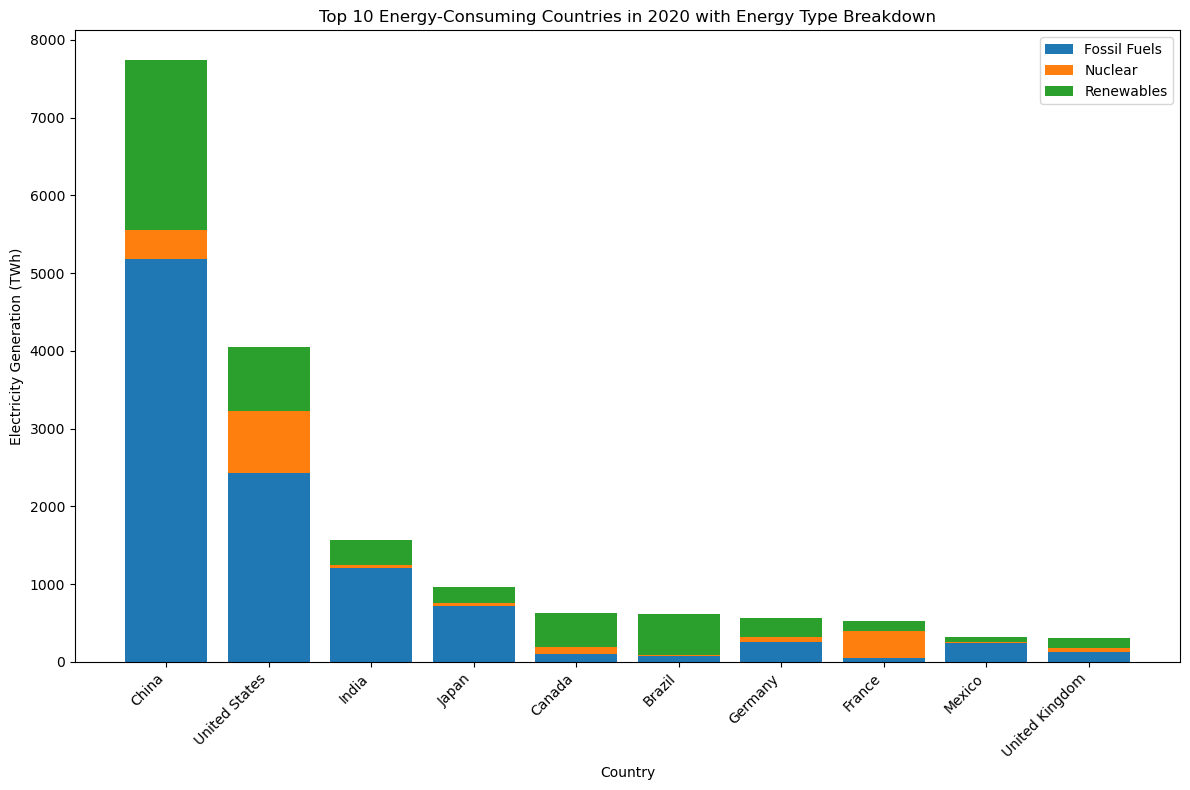

In [15]:
#The same as above but also adding the energy type breakdown in 2020
global_df['Total Electricity (TWh)'] = (global_df['Electricity from fossil fuels (TWh)'] + global_df['Electricity from nuclear (TWh)'] + global_df['Electricity from renewables (TWh)'])
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()

latest_year_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

top10_countries = latest_year_df.nlargest(10, 'Total Electricity (TWh)')

plt.figure(figsize=(12, 8))


plt.bar(top10_countries['Entity'], top10_countries['Electricity from fossil fuels (TWh)'], label='Fossil Fuels')
plt.bar(top10_countries['Entity'], top10_countries['Electricity from nuclear (TWh)'],
        bottom=top_countries['Electricity from fossil fuels (TWh)'], label='Nuclear')
plt.bar(top10_countries['Entity'], top10_countries['Electricity from renewables (TWh)'],
        bottom=(top10_countries['Electricity from fossil fuels (TWh)'] + 
                top10_countries['Electricity from nuclear (TWh)']),
        label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Top 10 Energy-Consuming Countries in 2020 with Energy Type Breakdown')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

This graph shows the breakdown by energy type of the top ten energy consuming countries. The total height of each bar represents the total amount of electricity generated per country, while the differentiated colors indicate the contribution of fossil fuels (blue), nuclear energy (orange) and renewable energy (green). China and the United States stand out not only for their total energy consumption, but also for having a significant mix of all three types of energy. In most countries represented, fossil fuels make up the majority of energy generation, although renewable energy also has a notable presence, suggesting a move towards more sustainable energy sources.

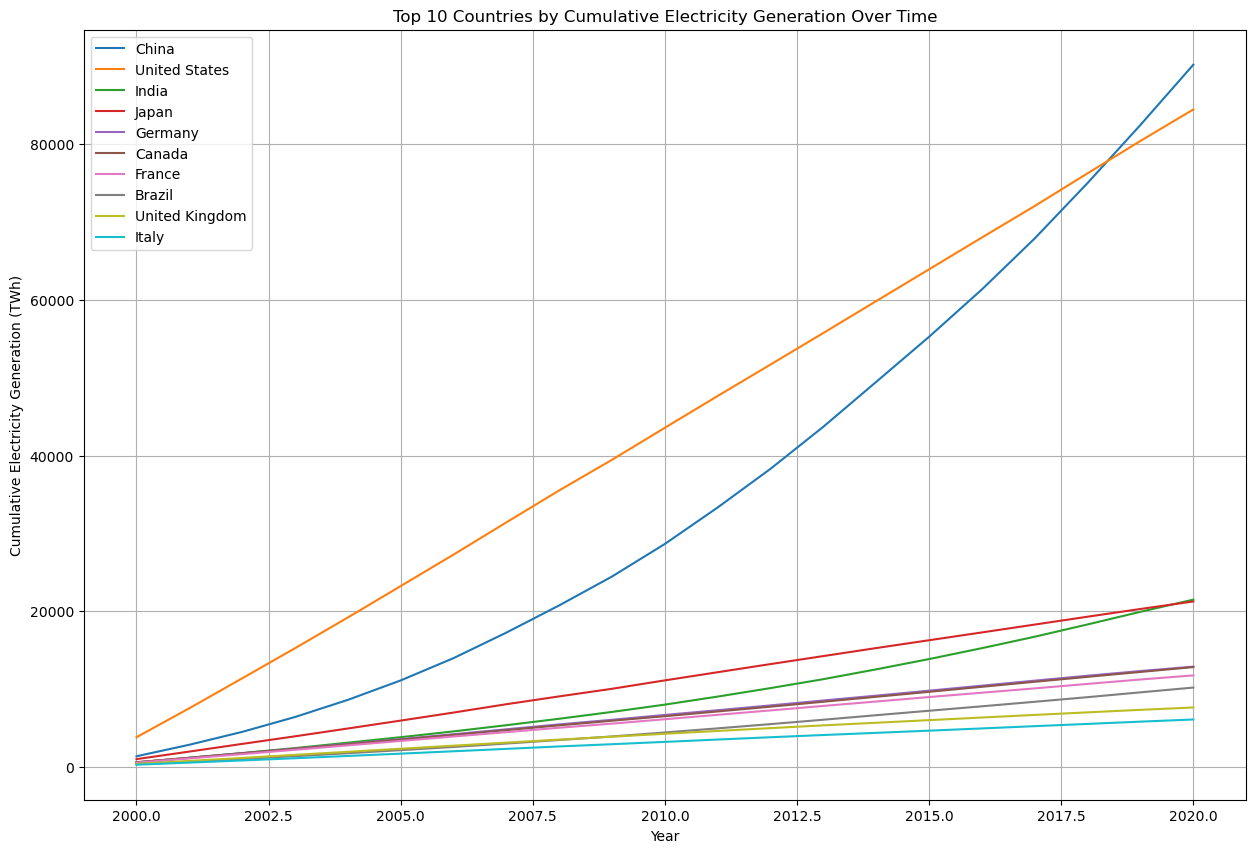

In [17]:

global_df['Total Electricity (TWh)'] = (global_df['Electricity from fossil fuels (TWh)'] + global_df['Electricity from nuclear (TWh)'] + global_df['Electricity from renewables (TWh)'])

grouped_df = global_df.groupby(['Entity', 'Year'])['Total Electricity (TWh)'].sum().reset_index()
grouped_df = grouped_df.sort_values(by=['Entity', 'Year'])
grouped_df['Cumulative Electricity (TWh)'] = grouped_df.groupby('Entity')['Total Electricity (TWh)'].cumsum()

top10_countries = grouped_df.groupby('Entity')['Cumulative Electricity (TWh)'].max().nlargest(10).index
top10_df = grouped_df[grouped_df['Entity'].isin(top10_countries)]

plt.figure(figsize=(15, 10))

for country in top10_countries:
    country_data = top10_df[top10_df['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Cumulative Electricity (TWh)'], label=country)

plt.xlabel('Year')
plt.ylabel('Cumulative Electricity Generation (TWh)')
plt.title('Top 10 Countries by Cumulative Electricity Generation Over Time')
plt.legend()
plt.grid(True)
plt.show()



/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_5558/1279643622.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2000_data['Total Electricity (TWh)'] = (year_2000_data['Electricity from fossil fuels (TWh)'] +


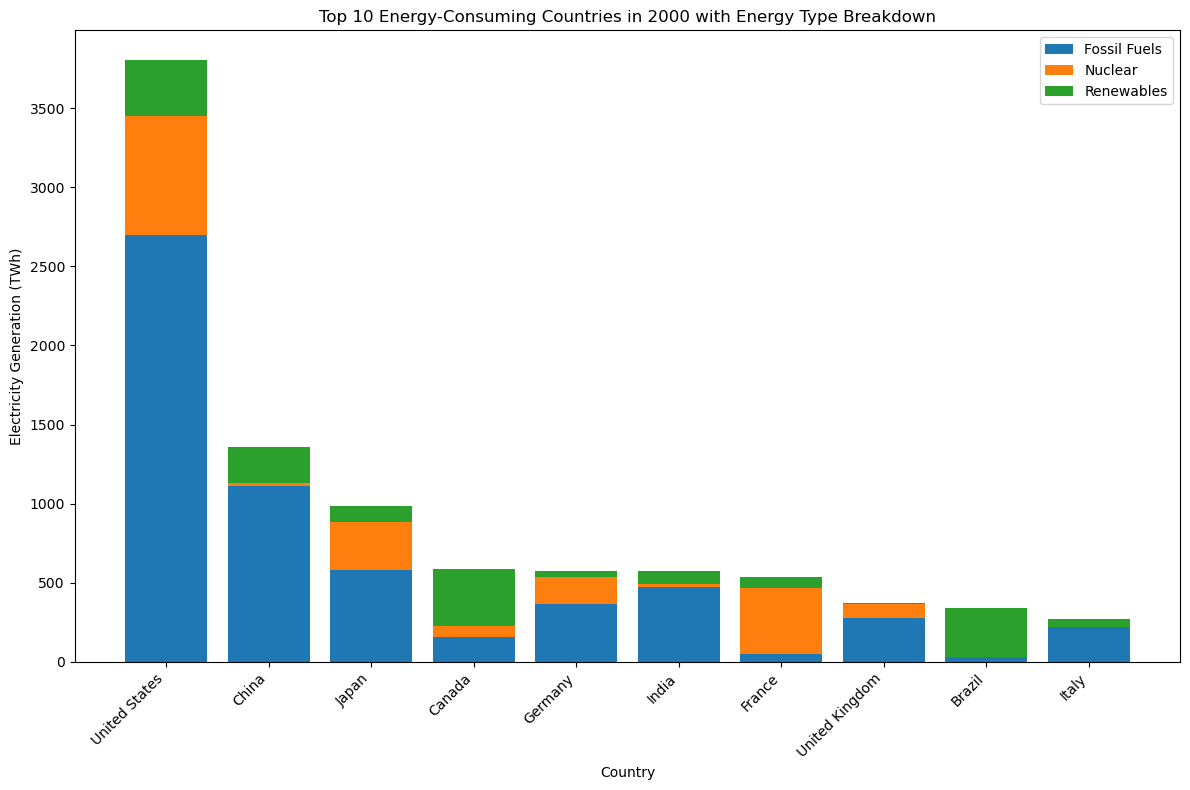

In [14]:
#The top 10 countries with most energy consumption in the year 2000
year_2000_data = global_df[global_df['Year'] == 2000]

year_2000_data['Total Electricity (TWh)'] = (year_2000_data['Electricity from fossil fuels (TWh)'] + year_2000_data['Electricity from nuclear (TWh)'] + year_2000_data['Electricity from renewables (TWh)'])
top_countries_2000 = year_2000_data.nlargest(10, 'Total Electricity (TWh)')

plt.figure(figsize=(12, 8))
plt.bar(top_countries_2000['Entity'], top_countries_2000['Electricity from fossil fuels (TWh)'], label='Fossil Fuels')
plt.bar(top_countries_2000['Entity'], top_countries_2000['Electricity from nuclear (TWh)'],
        bottom=top_countries_2000['Electricity from fossil fuels (TWh)'], label='Nuclear')
plt.bar(top_countries_2000['Entity'], top_countries_2000['Electricity from renewables (TWh)'],
        bottom=(top_countries_2000['Electricity from fossil fuels (TWh)'] + 
                top_countries_2000['Electricity from nuclear (TWh)']),
        label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Top 10 Energy-Consuming Countries in 2000 with Energy Type Breakdown')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


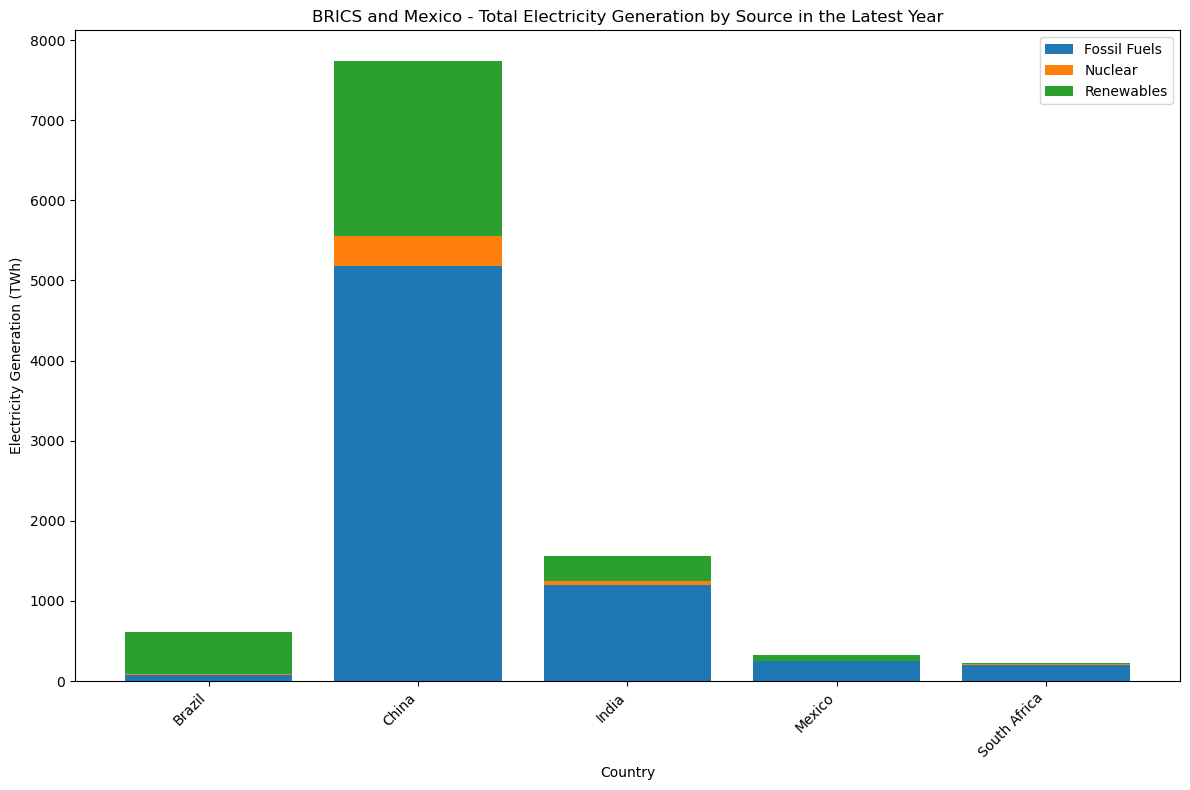

In [9]:
#Focusing on BRICS and also adding Mexico
brics_mexico = ['Brazil', 'Russia', 'India', 'China', 'South Africa', 'Mexico']

brics_mexico_df = global_df[global_df['Entity'].isin(brics_mexico)]

latest_years = brics_mexico_df.groupby('Entity')['Year'].max().reset_index()

latest_data = brics_mexico_df.merge(latest_years, on=['Entity', 'Year'])

latest_data['Total Electricity (TWh)'] = (latest_data['Electricity from fossil fuels (TWh)'] +
                                          latest_data.get('Electricity from nuclear (TWh)', 0) +
                                          latest_data['Electricity from renewables (TWh)'])

plt.figure(figsize=(12, 8))
plt.bar(latest_data['Entity'], latest_data['Electricity from fossil fuels (TWh)'], label='Fossil Fuels')
plt.bar(latest_data['Entity'], latest_data.get('Electricity from nuclear (TWh)', 0), bottom=latest_data['Electricity from fossil fuels (TWh)'], label='Nuclear')
plt.bar(latest_data['Entity'], latest_data['Electricity from renewables (TWh)'], bottom=latest_data['Electricity from fossil fuels (TWh)'] + latest_data.get('Electricity from nuclear (TWh)', 0), label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('BRICS and Mexico - Total Electricity Generation by Source in the Latest Year')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


The graph shows the total electricity generation by source in the last available year for the BRICS countries and Mexico. Each bar represents a country and is divided into colored segments that represent different energy sources: blue for fossil fuels, orange for nuclear and green for renewables.

China is seen leading with a significant amount of electricity generated, predominantly from fossil fuels, followed by a smaller share from renewable and nuclear energy. India also shows a mix of all three energy sources, with a prominent presence of renewable energy compared to the other countries.

Brazil, Mexico and South Africa show lower usage in terms of total electricity generation, with a stronger focus on renewables for Brazil and South Africa. Mexico has a more balanced generation between fossils and renewables, with a very small portion of nuclear.

In summary, the graph illustrates each country's dependence on different energy sources and shows the diversity of energy profiles within the BRICS group and Mexico. China and India have the highest energy consumption, with a significant mix of all sources, while the other countries featured depend to a greater extent on renewable energy and to a lesser extent on nuclear.

/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_23069/2399595958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Total Electricity (TWh)'] = (latest_data['Electricity from fossil fuels (TWh)'] +


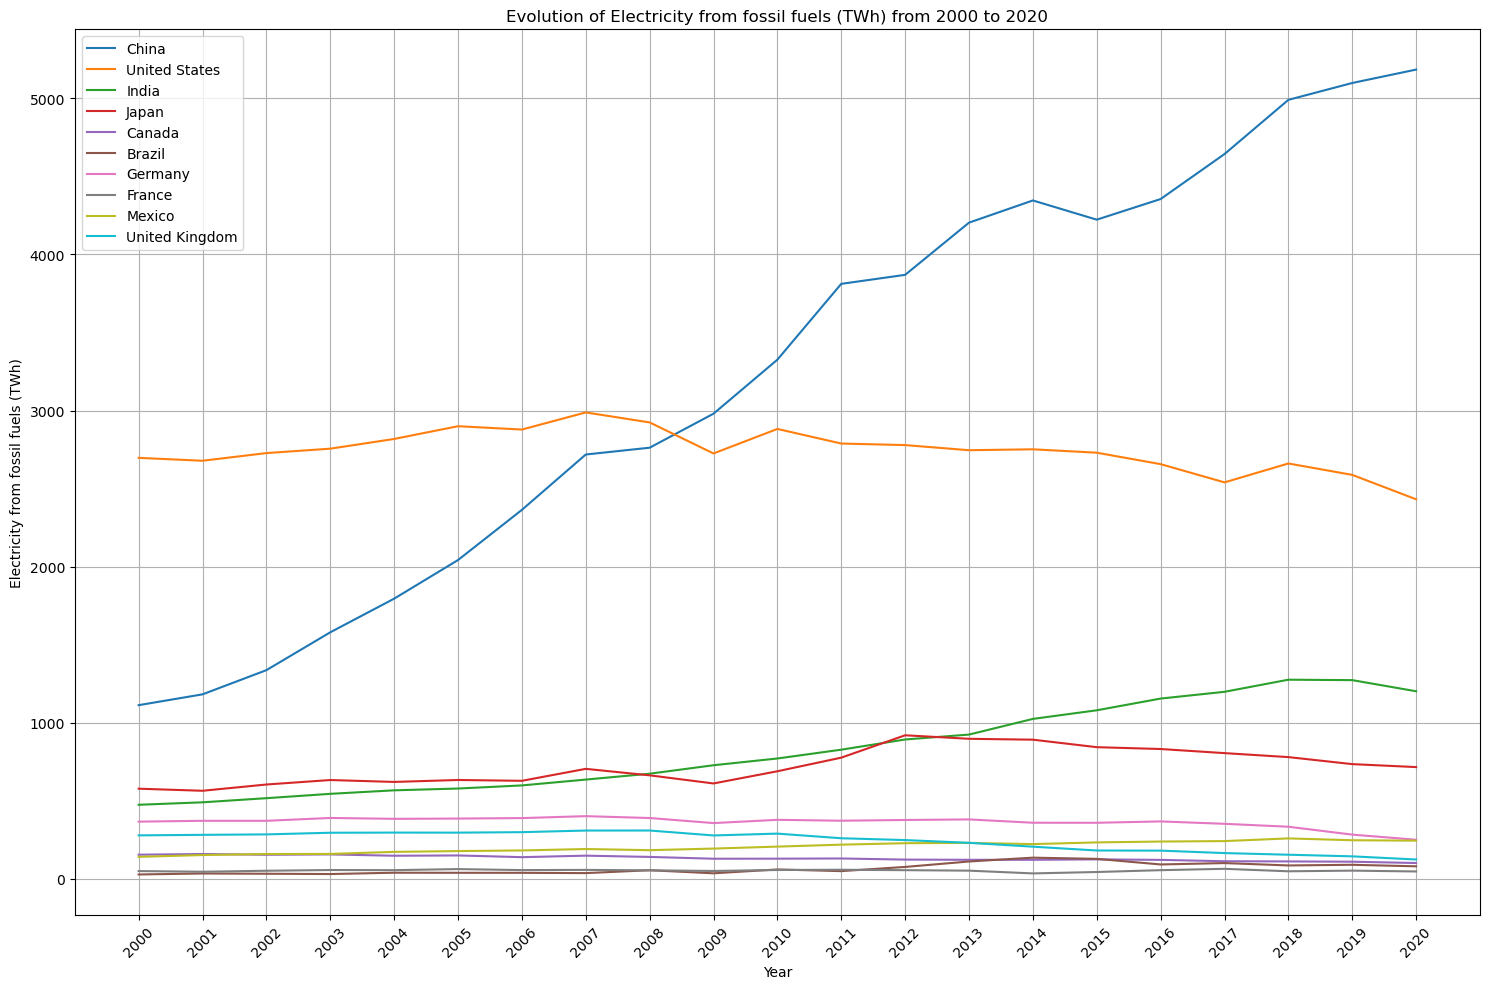

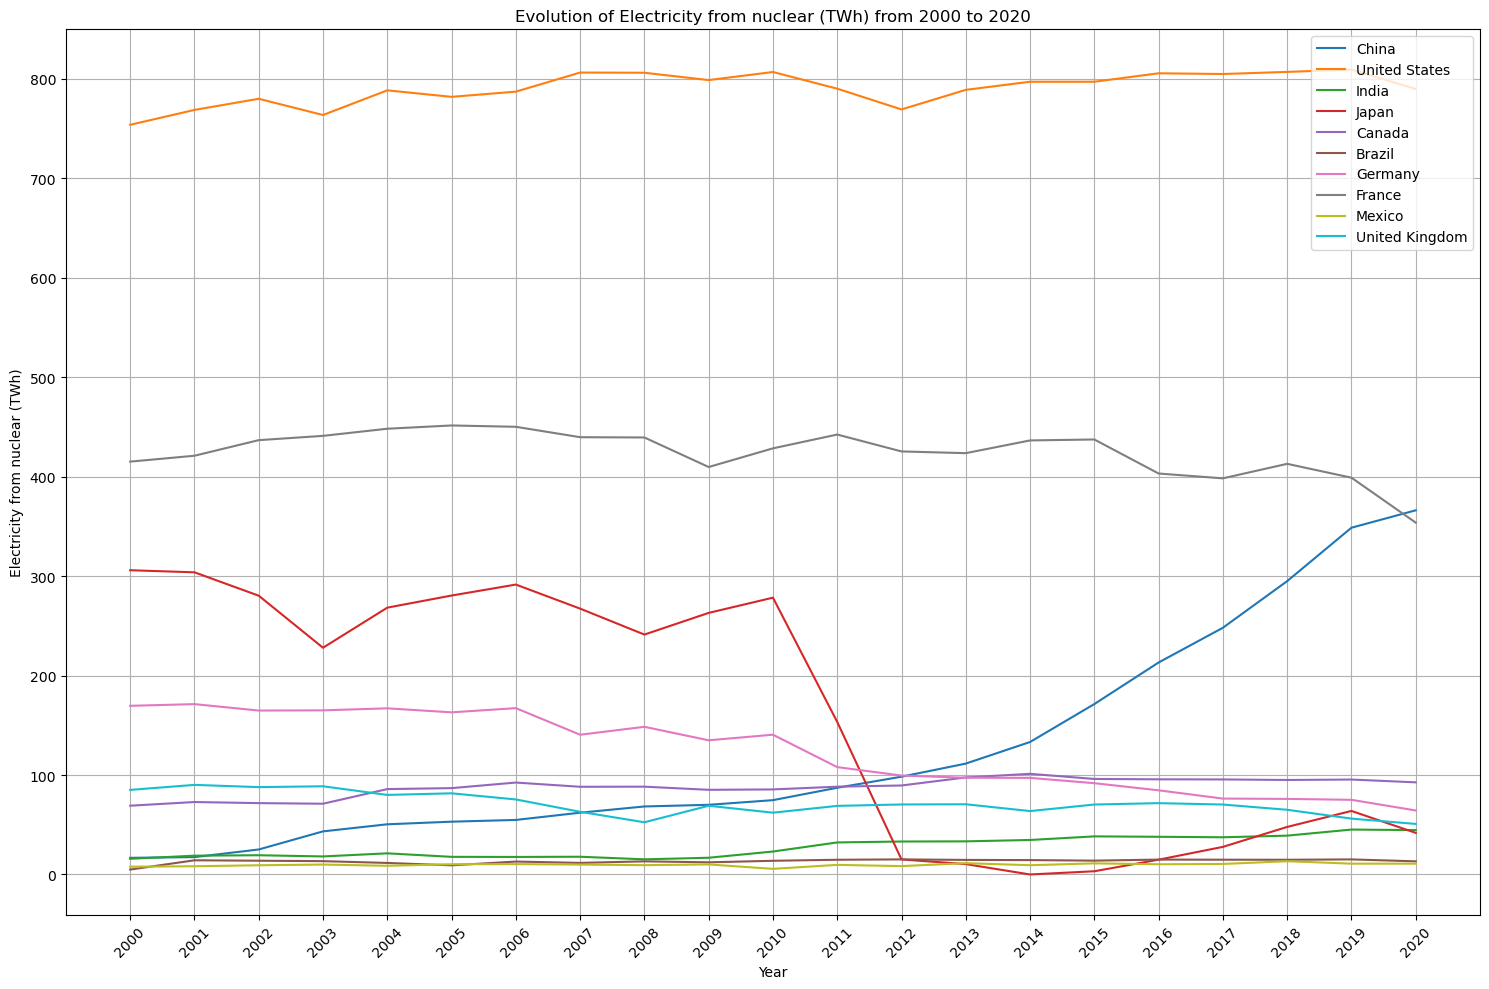

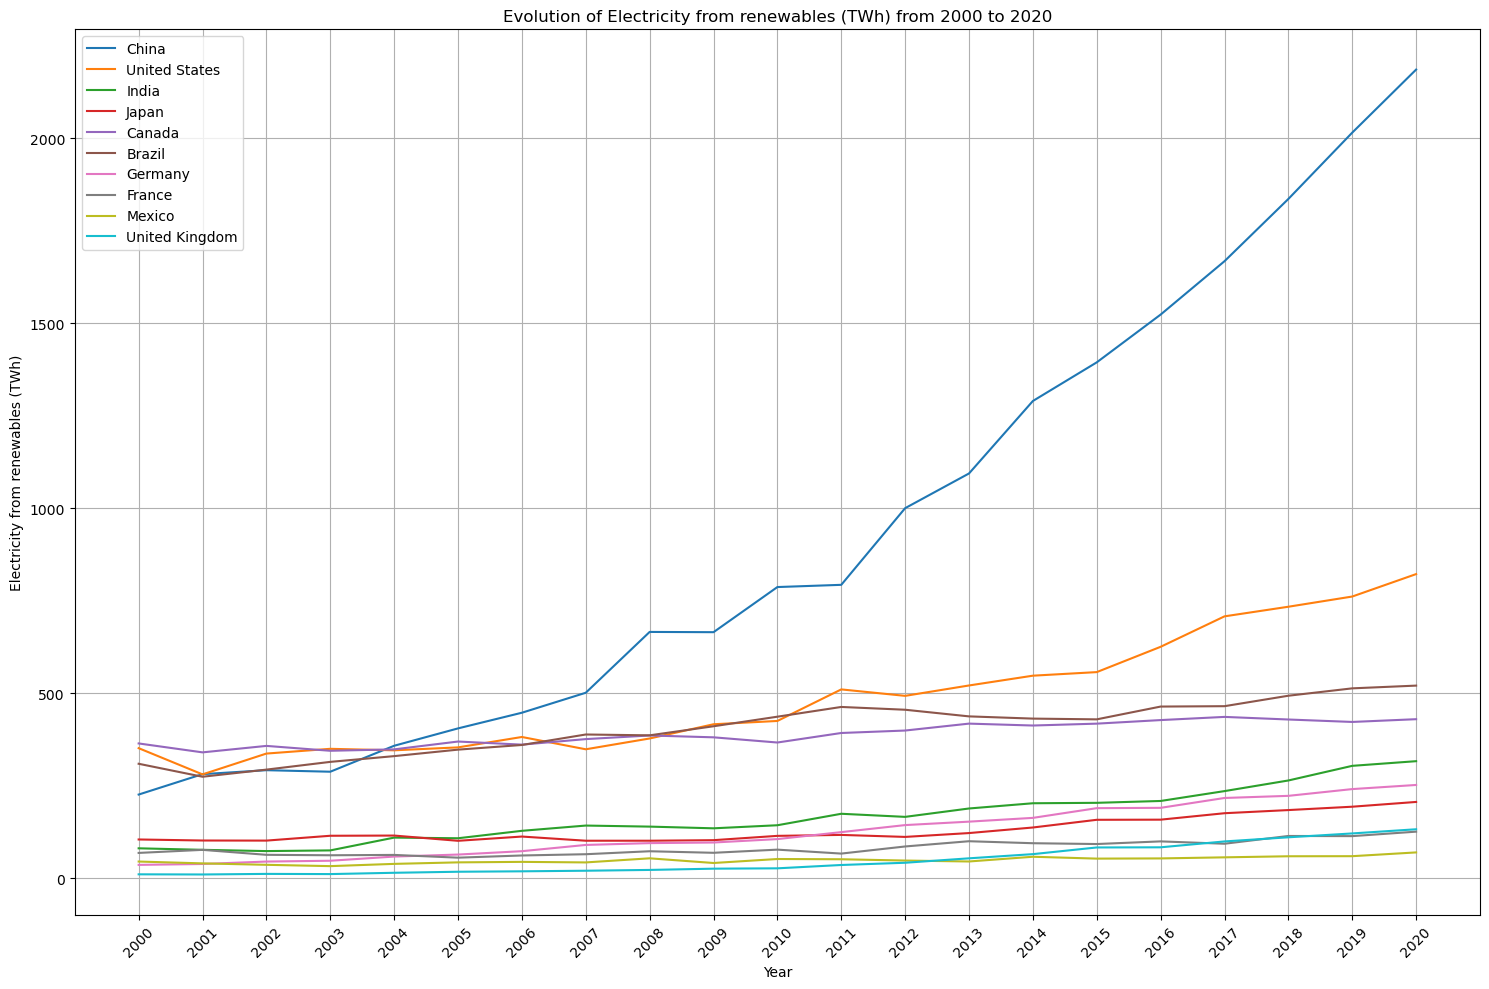

In [33]:
#Evolution of each energy type through 2000-2020
latest_year = global_df['Year'].max()

latest_data = global_df[global_df['Year'] == latest_year]
latest_data['Total Electricity (TWh)'] = (latest_data['Electricity from fossil fuels (TWh)'] + latest_data['Electricity from nuclear (TWh)'] +latest_data['Electricity from renewables (TWh)'])

top_countries_latest_year = latest_data.nlargest(10, 'Total Electricity (TWh)')['Entity'].tolist()
top_countries_data = global_df[(global_df['Entity'].isin(top_countries_latest_year)) & (global_df['Year'] >= 2000) & (global_df['Year'] <= 2020)]

for energy_type in ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']:
    plt.figure(figsize=(15, 10))
    
    for country in top_countries_latest_year:
        country_data = top_countries_data[top_countries_data['Entity'] == country]
        plt.plot(country_data['Year'], country_data[energy_type], label=country)

    plt.title(f'Evolution of {energy_type} from 2000 to 2020')
    plt.xlabel('Year')
    plt.ylabel(f'{energy_type}')
    plt.legend()
    plt.xticks(range(2000, 2021, 1), rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Fossil Fuels: China and the United States show the highest and growing trends in electricity generation from fossil fuels, with China overtaking the US around 2007. Other countries show much lower and relatively stable trends.

Nuclear Energy: The United States and France are the leading countries in nuclear energy production, with the US showing a slight downward trend after 2010. China's nuclear production starts growing notably around 2012.

Renewables: China shows a significant and steep increase in electricity generation from renewables, especially after 2010. The United States and Germany also show growth, but it's more gradual. The other countries have much lower generation rates from renewables, with modest increases over time.

In summary, China's rapid expansion in both renewable and nuclear energy generation stands out, indicating a strong shift towards these sources over the last two decades. The United States also shows considerable generation from renewables and nuclear, although its reliance on fossil fuels remains high. Other countries included in these graphs are increasing their renewable energy output but at a slower pace.

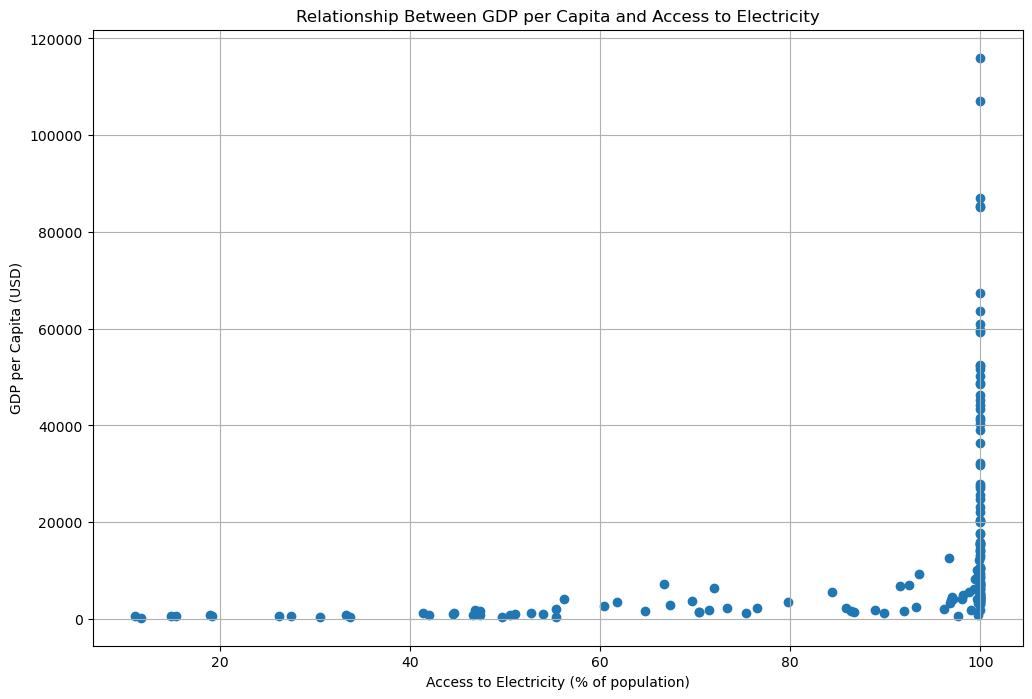

                                         Access to electricity (% of population)  \
Access to electricity (% of population)                                  1.00000   
gdp_per_capita                                                           0.37218   

                                         gdp_per_capita  
Access to electricity (% of population)         0.37218  
gdp_per_capita                                  1.00000  


,Entity,Year,Access to electricity (% of population),gdp_per_capita
0,Afghanistan,2000,1.613591,NaN
1,Afghanistan,2001,4.074574,NaN
2,Afghanistan,2002,9.409158,179.426579
3,Afghanistan,2003,14.738506,190.683814
4,Afghanistan,2004,20.064968,211.382074
...,...,...,...,...
3644,Zimbabwe,2016,42.561730,1464.588957
3645,Zimbabwe,2017,44.178635,1235.189032
3646,Zimbabwe,2018,45.572647,1254.642265
3647,Zimbabwe,2019,46.781475,1316.740657


In [34]:
#Scatter plot of the relation between GDP and the access to the electricity
analysis_df = global_df[['Entity', 'Year', 'Access to electricity (% of population)', 'gdp_per_capita']].copy()

latest_year = analysis_df['Year'].max()
analysis_latest_year_df = analysis_df[analysis_df['Year'] == latest_year]
correlation = analysis_latest_year_df[['Access to electricity (% of population)', 'gdp_per_capita']].corr()

plt.figure(figsize=(12, 8))
plt.scatter(analysis_latest_year_df['Access to electricity (% of population)'], analysis_latest_year_df['gdp_per_capita'])

plt.title('Relationship Between GDP per Capita and Access to Electricity')
plt.ylabel('GDP per Capita (USD)')
plt.xlabel('Access to Electricity (% of population)')
plt.grid(True)
plt.show()


print(correlation)

analysis_df

The graph appears to plot GDP per capita against the percentage of a population with access to electricity.

There is a clear positive correlation between access to electricity and GDP per capita.
Most points cluster at the higher end of electricity access (close to 100%), where GDP per capita varies widely.
This suggests that once a threshold of electricity access is met, other factors likely contribute to further increases in GDP per capita.
Some countries with high GDP per capita show full access to electricity, while countries with lower GDP per capita exhibit a wide range of access levels.

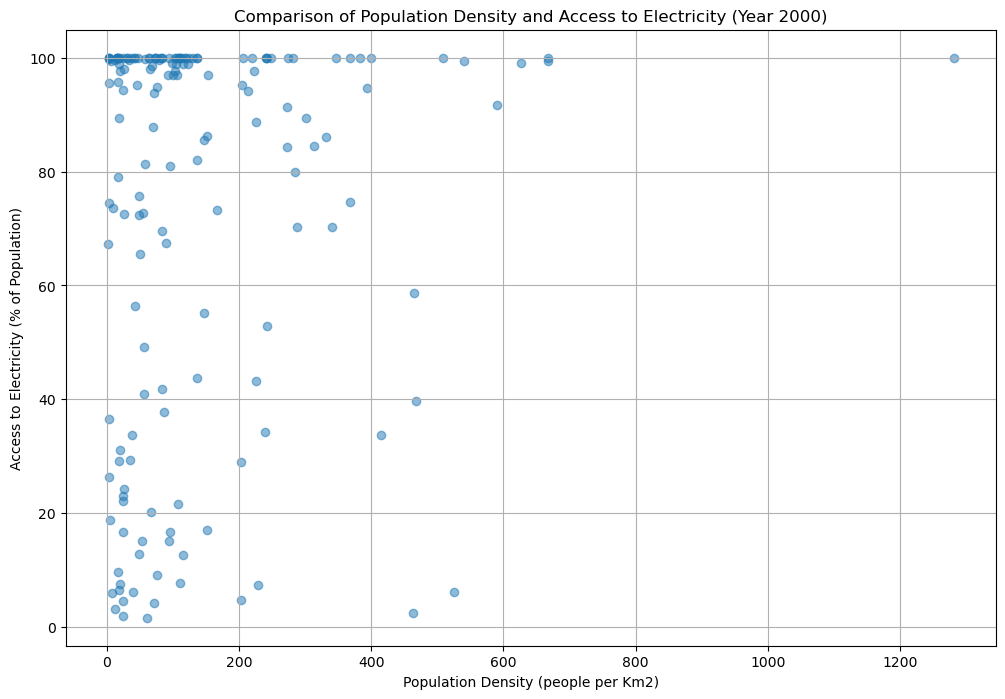

In [13]:
#Scatter plot of density population compared to the access to electricity in the 2000
analysis_year_2000_df = global_df[global_df['Year'] == 2000].copy()
analysis_year_2000_df['Density'] = pd.to_numeric(analysis_year_2000_df['Density'], errors='coerce')

cutoff = 10000 
filtered_df_2000 = analysis_year_2000_df[analysis_year_2000_df['Density'] < cutoff]

plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_df_2000['Density'],
    filtered_df_2000['Access to electricity (% of population)'],
    alpha=0.5
)
plt.xlabel('Population Density (people per Km2)')
plt.ylabel('Access to Electricity (% of Population)')
plt.title('Comparison of Population Density and Access to Electricity (Year 2000)')
plt.grid(True)
plt.show()


This scatter plot from the year 2000 compares population density with access to electricity.

- Many data points cluster near the top, especially at lower densities, suggesting that even in less populated areas, a high percentage of the population had access to electricity in 2000.
- There's a significant number of areas with lower access rates, which are scattered across the full range of population densities, indicating that population density alone didn't predict electricity access.
- Some very densely populated areas had varied access to electricity, possibly indicating infrastructure or economic challenges.
- The trend seems less consistent compared to later years, showing that over time there may have been improvements in access to electricity regardless of population density.

In [ ]:
global_df2=global_df.loc["Density(P/Km2)"]

In [ ]:
column_names = global_df.columns.tolist()
column_names

In [ ]:
relevant_columns=global_df.columns.tolist()
relevant_columns